1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting

   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

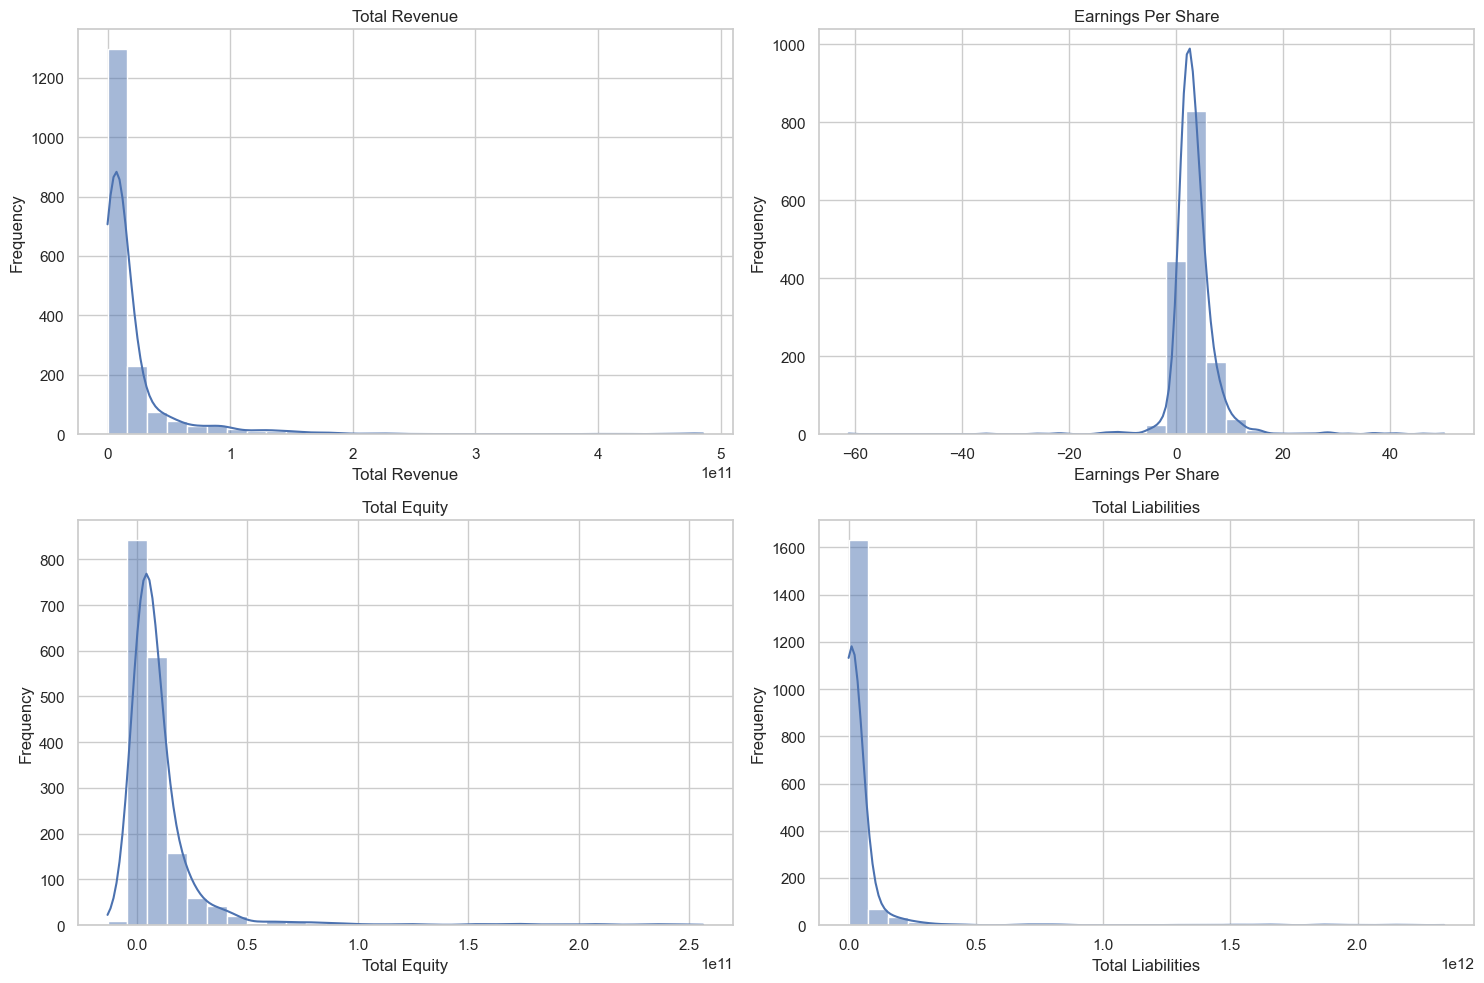

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file = 'fundamentals.csv'
file_df = pd.read_csv(file)

# Display the first few rows
print(file_df.head())

# Plot on White Grid
sns.set(style="whitegrid")

# Selecting a few financial indicators for visualization
key_metrics = ['Total Revenue', 'Earnings Per Share', 'Total Equity', 'Total Liabilities']

# Creating histograms for the selected metrics
plt.figure(figsize=(15, 10))

for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(file_df[metric].dropna(), bins=30, kde=True)
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model.

Model Explained:
My code creates and evaluates a linear regression model to predict 'Estimated Shares Outstanding' based on metrics like 'Total Revenue', 'Total Equity', 'Total Liabilities', and 'Earnings Per Share'. It splits the data into training and testing sets, fits the model on the training data, then assesses its accuracy using several summary stats like R-Squared, Adjusted R-Squared, F-Statistic, AIC, BIC, etc.

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Dropping rows with missing 'Estimated Shares Outstanding'
file_df = file_df.dropna(subset=['Estimated Shares Outstanding'])

# Define features and target variable
features = ['Total Equity', 'Total Liabilities', 'Earnings Per Share']
X = file_df[features]
y = file_df['Estimated Shares Outstanding']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant term for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Display the summary of the model
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.578
Model:                                      OLS   Adj. R-squared:                  0.577
Method:                           Least Squares   F-statistic:                     569.1
Date:                          Mon, 15 Jan 2024   Prob (F-statistic):          8.06e-233
Time:                                  20:20:31   Log-Likelihood:                -27342.
No. Observations:                          1249   AIC:                         5.469e+04
Df Residuals:                              1245   BIC:                         5.471e+04
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients.

Explanation: Multicollinearity in linear regression happens when predictor variables are closely linked, leading to unreliable and unstable coefficient estimates. This makes it hard to figure out which variables truly influence the target variable and can result in misleading conclusions about the importance and impact of each predictor.

4. P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation

Explanation: NEED ANSWER. CODE DONE

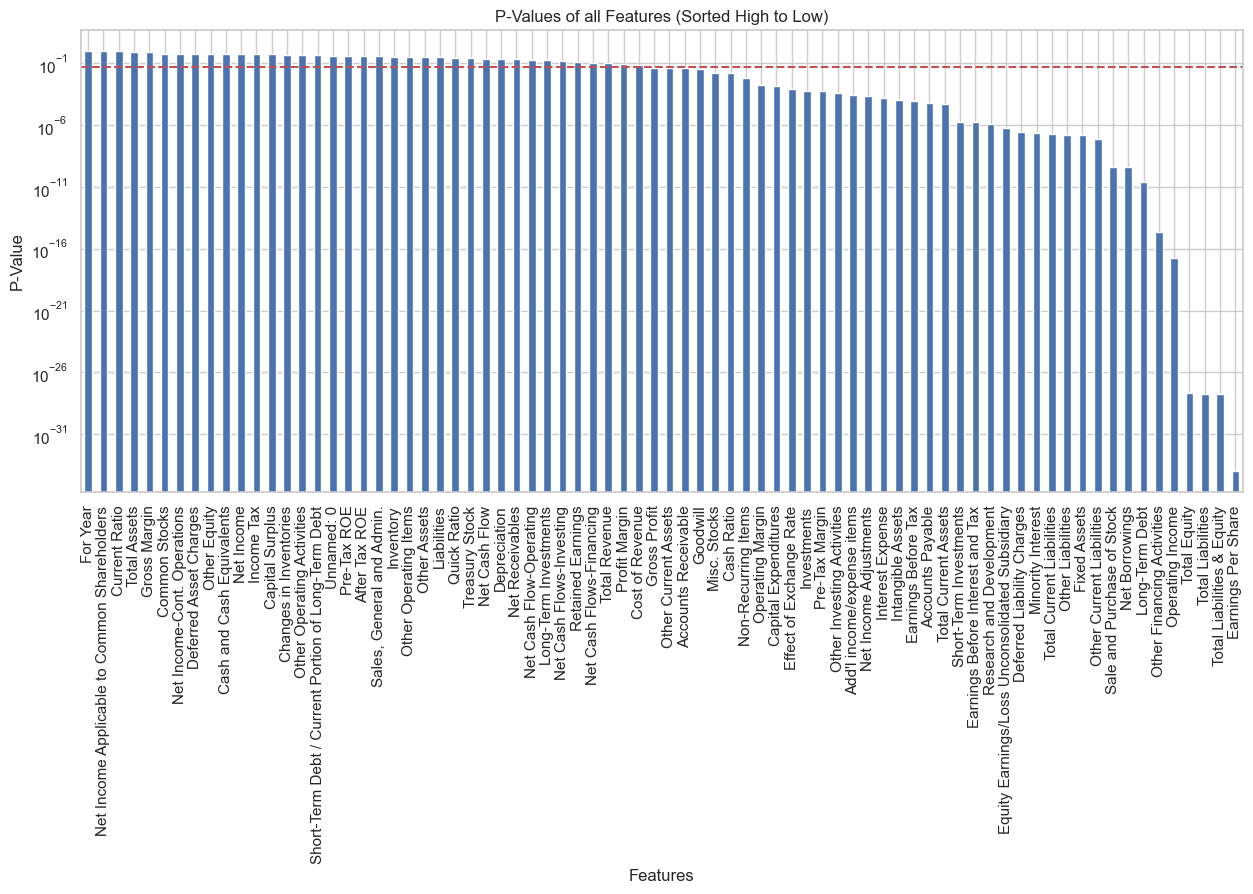

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Selecting all numerical features for the model, excluding the target variable
features = file_df.select_dtypes(include=['float64', 'int64']).columns.drop('Estimated Shares Outstanding')

# Preparing the data
X = file_df[features].fillna(0)  # Handling missing values by filling them with 0
y = file_df['Estimated Shares Outstanding'].dropna()

# Aligning X and y to ensure they have the same length
X = X.loc[y.index]

# Adding a constant to the model (for the intercept)
X_const = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X_const).fit()

# Extracting p-values
p_values = model.pvalues

# Sorting the p-values in descending order
sorted_p_values = p_values.sort_values(ascending=False)

# Plotting the histogram of p-values using seaborn
plt.figure(figsize=(15, 6))
sns.histplot(sorted_p_values, bins=50, kde=False)
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values')
plt.axvline(x=0.05, color='r', linestyle='--')  # Line for the 0.05 significance level
plt.yscale('log')  # Log scale for better visualization
plt.show()

5. False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate?

Answer: Code analysis shows 39 discoveries.

In [5]:
import numpy as np

def bh_procedure(p_values, q=0.1):
    # Sorting p-values in ascending order
    sorted_p_values = np.sort(p_values)
    m = len(p_values)  # Total number of tests

    # BH thresholds
    thresholds = np.array([i/m*q for i in range(1, m+1)])

    # Finding the largest p-value where p-value < threshold
    true_discoveries = sorted_p_values[sorted_p_values < thresholds]
    return len(true_discoveries)

# Applying the BH procedure to your p-values
num_true_discoveries = bh_procedure(p_values, q=0.1)
print("Number of 'true' discoveries:", num_true_discoveries)

Number of 'true' discoveries: 39


6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables?

Answer: From my graph, we can see that as the threshold for what we consider significant (the q value) goes up, the number of features identified as "true discoveries" also increases. For instance, when the q value is just above 0.05, the number of true discoveries jumps significantly. The more relaxed and less strict we are on what we consider significant (higher q-value), the more attributes we will consider valuable and significant in our analysis. The values at lower q-values are the most robust, while the ones at higher values are the opposite.

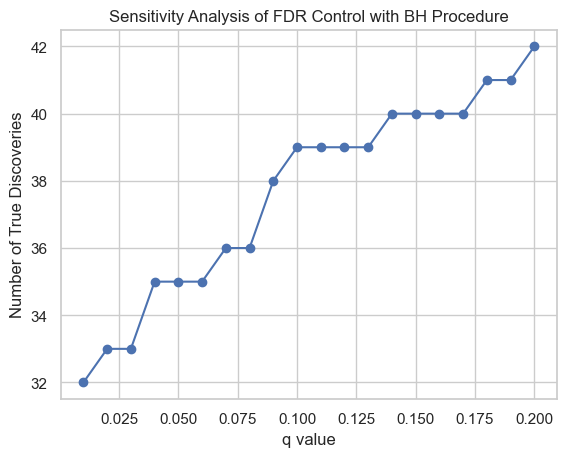

In [6]:
# Define a range of q values
q_values = np.linspace(0.01, 0.2, 20)

# Applying the BH procedure for each q value
true_discoveries = [bh_procedure(p_values, q) for q in q_values]

# Plotting the results
plt.plot(q_values, true_discoveries, marker='o')
plt.xlabel('q value')
plt.ylabel('Number of True Discoveries')
plt.title('Sensitivity Analysis of FDR Control with BH Procedure')
plt.grid(True)
plt.show()

Exploring Interaction Terms:
7) a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.

In [30]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Load your dataset
file_df = pd.read_csv('fundamentals.csv')  # Replace with the correct path to your CSV file
file_df = file_df.drop('Unnamed: 0', axis=1)

# Selecting the first 25 numeric features, excluding the target variable
numeric_features = file_df.select_dtypes(include=['float64', 'int64']).columns.drop('Estimated Shares Outstanding')[:25]

# Preparing the features (X) and target (y)
X = file_df[numeric_features]
y = file_df['Estimated Shares Outstanding']

# Drop rows with NaN values in either features or the target
combined_df = pd.concat([X, y], axis=1).dropna()

# Split into features and target again after dropping NaN values
X = combined_df[numeric_features]
y = combined_df['Estimated Shares Outstanding']
y = list(y)

# Create interaction terms (up to quadratic terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Convert the interaction terms into a DataFrame
X_interaction_df = pd.DataFrame(X_interaction, columns=poly.get_feature_names_out(X.columns))

# Add a constant to the model (for the intercept)
X_interaction_const = sm.add_constant(X_interaction_df)

# Fit the model
model = sm.OLS(y, X_interaction_const).fit()

# Print out the summary of the model
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     53.66
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:39:16   Log-Likelihood:                -26923.
No. Observations:                1299   AIC:                         5.444e+04
Df Residuals:                    1002   BIC:                         5.598e+04
Df Model:                         296                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Exploring Interaction Terms:
7) b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics

Answer: Interaction terms can show us how the combined effect of two financial metrics on Estimated Shares Outstanding might be different from the effect of each metric on its own, providing a more detailed understanding of their relationships.

Exploring Interaction Terms:
8) c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics

Answer:

The original model has an R-squared of 0.578 and an adjusted R-squared of 0.577. The new model shows an R-squared of 0.941 and an adjusted R-squared of 0.923. The new model has significantly higher values, suggesting it explains more variance in the dependent variable

The original model has an F-statistic of 569.1 with a very small Prob (F-statistic), indicating a statistically significant model. The new model's F-statistic is 53.66, also with a small p-value, indicating significance. However, the original model has a much higher F-statistic, suggesting stronger overall significance despite fewer variables.

The original model has AIC of approximately 5.469e+04 and BIC of 5.471e+04. The new model has AIC of 5.444e+04 and BIC of 5.598e+04. The new model's AIC is slightly better, but its BIC is worse, likely due to the large number of predictors, which BIC penalizes more heavily.

Conclusion: The new model has a higher R-squared, indicating it explains more variance, but also shows signs of potential overfitting and severe multicollinearity. The original model, while less complex, seems to provide a more balanced approach. Although, since there is such a big differe in R-Squared, i would still use the New Model instead even though it is complex.

Exploring Interaction Terms:
d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

R-squared: The new model has a much higher R-squared value (0.941 vs. 0.578 in the original model). This means that the new model with interaction terms explains a greater portion of the variance in the dependent variable. However, this high R-squared value might also indicate overfitting.

Adjusted R-squared: The adjusted R-squared value, which accounts for the number of predictors in the model, is also higher in the new model (0.923 vs. 0.577 in the original model). This suggests improved performance.

F-statistic: The F-statistic is lower in the new model (53.66) compared to the original model (569.1), indicating that the overall model significance is more robust in the original model despite its fewer variables.

AIC and BIC: The new model has a slightly lower AIC but a higher BIC than the original model. The higher BIC in the new model indicates that the additional complexity from the interaction terms may not be justifiable.

Discuss any significant changes in the model's performance or the coefficients of the predictors

Answer: NEEDS ANSWERING

9) a. FDR Analysis with Interaction Terms:
Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.

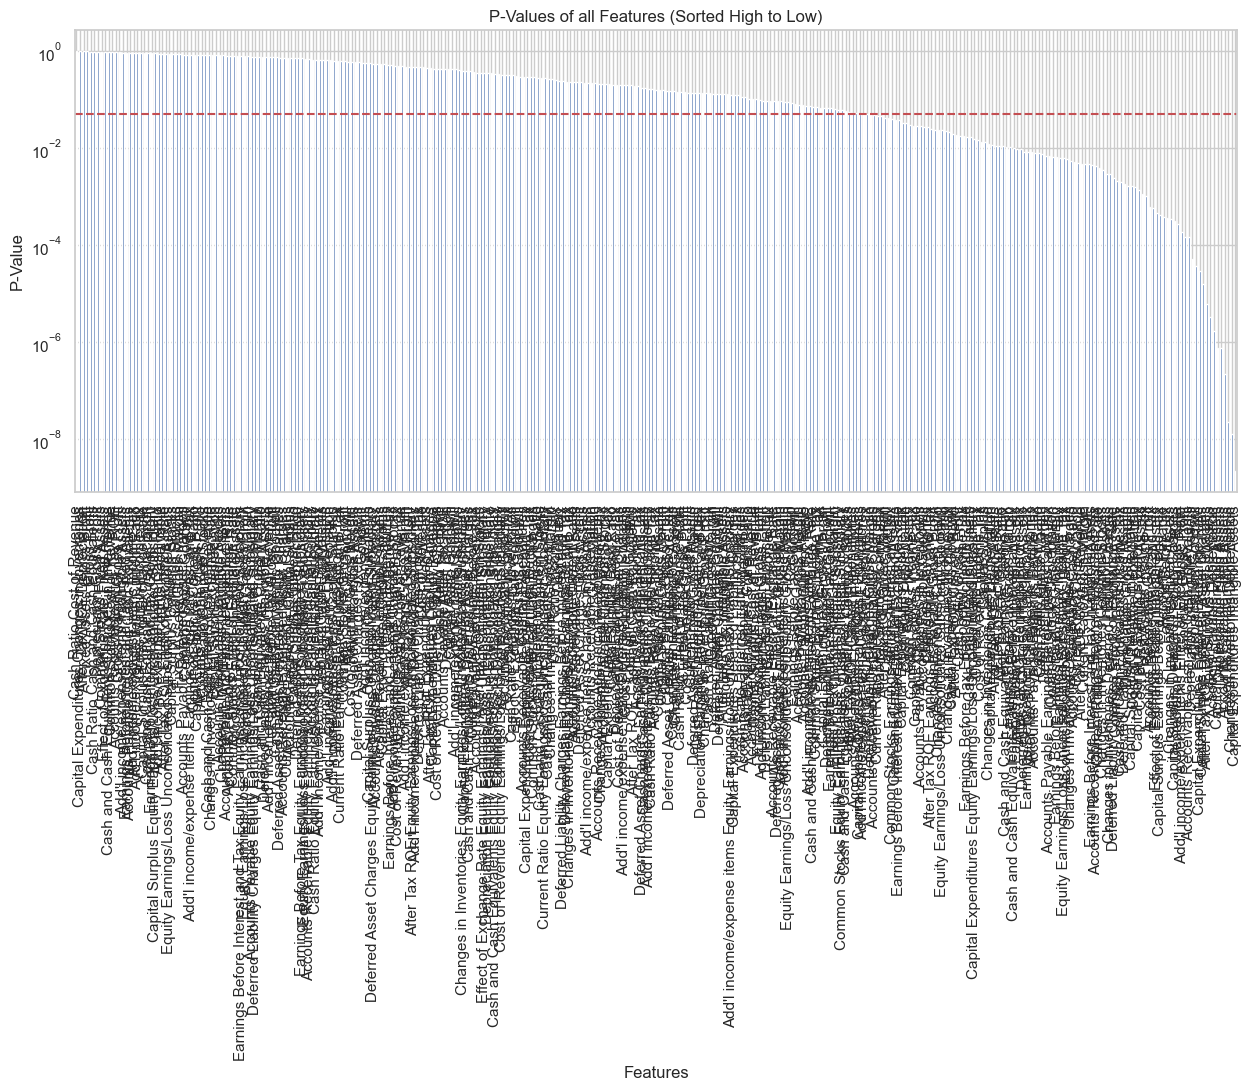

In [31]:
# Extracting p-values of our previously loaded new model
p_values = model.pvalues

# Sorting the p-values in descending order
sorted_p_values = p_values.sort_values(ascending=False)

# Plotting the sorted p-values
plt.figure(figsize=(15, 6))
sorted_p_values.drop('const').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.title('P-Values of all Features (Sorted High to Low)')
plt.yscale('log')  # Log scale for better visualization
plt.axhline(y=0.05, color='r', linestyle='--')  # Line for the 0.05 significance level
plt.show()

9) b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects?

Answer: 86 significant predictors.

In [32]:
from statsmodels.stats.multitest import multipletests

# Assuming 'model' is the fitted OLS model from statsmodels and p_values is obtained
p_values = model.pvalues

# Apply Benjamini-Hochberg procedure
# The multipletests function returns a tuple of arrays. The second array indicates
# which hypotheses are rejected (True means rejected)
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.1, method='fdr_bh')

# Count the number of significant predictors
significant_predictors_count = rejected.sum()
print(f"Number of significant predictors identified by BH procedure: {significant_predictors_count}")


Number of significant predictors identified by BH procedure: 86


9) c. Including interaction terms in the model led to an increase in discoveries from 39 to 86 significant predictors, indicating more complex relationships between variables. However, this could also mean potential overfitting and the need for managing the risk of false discovery rates due to multiple testing.